# 문제
```
1. 데이터들을 normalization
    각 feature별로
    출력값 
2. DNN. 2->1......  13->1
3. metric. 'mape'
```

```
요구사항
  - train_loss, val_loss 그래프 그리기
  - test데이터에 대한 mape 출력

  - 오버피팅 완화해서 성능 개선해 보기
```

# importing


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Input

import time

# data loading

In [2]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [3]:
print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)
      

(404, 13)
(404,)
(102, 13)
(102,)


In [4]:
print(raw_train_x[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [5]:
print(raw_train_y[:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


# 데이터 살펴보기

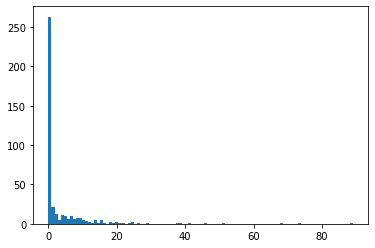

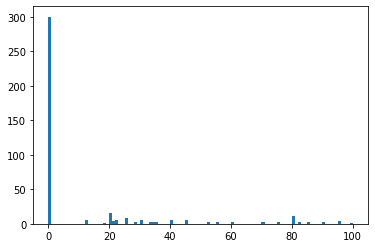

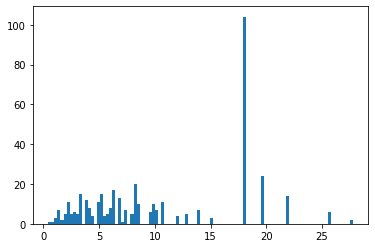

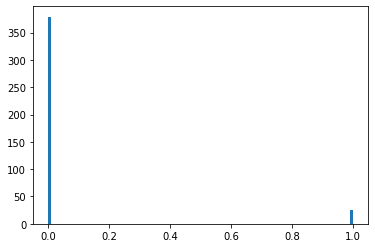

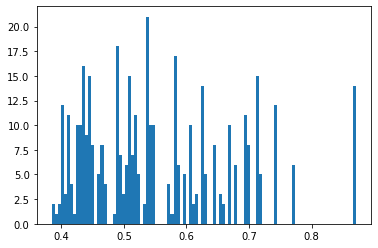

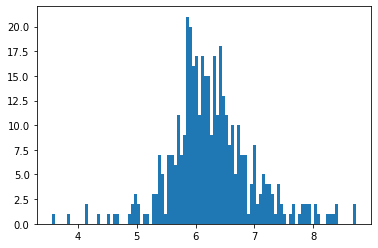

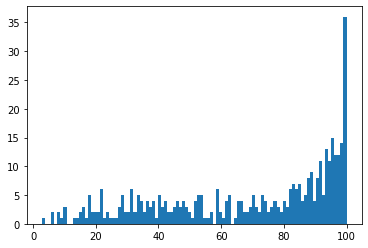

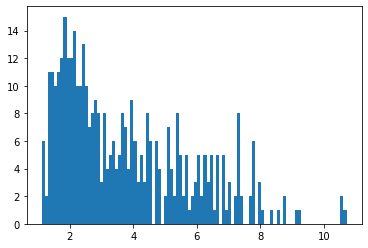

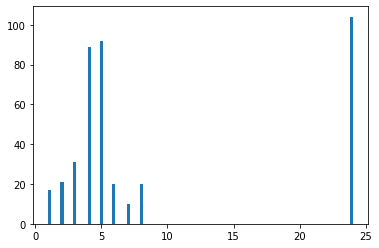

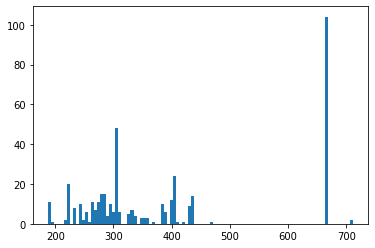

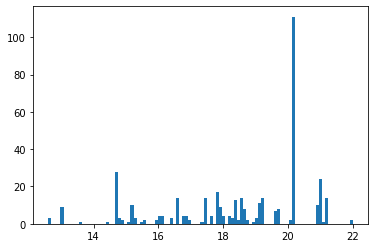

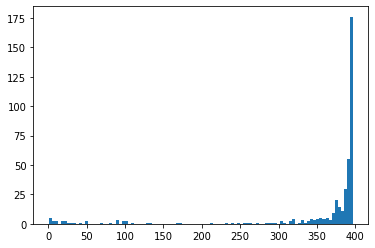

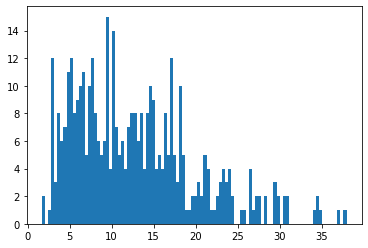

In [6]:
for i in range(13):
  plt.hist(raw_train_x[:,i], bins=100)
  plt.show()

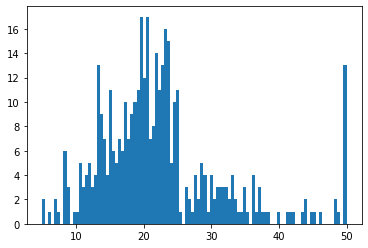

In [7]:
plt.hist(raw_train_y, bins=100)
plt.show()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [9]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

In [10]:
import time

## normalization

In [11]:
train_x = raw_train_x
train_y = raw_train_y
test_x = raw_test_x
test_y = raw_test_y

In [12]:
for i in range(13):
  target = raw_train_x[:,i]
  min = np.min(target)
  max = np.max(target)
  print(min, max)
  train_x[:,i] = (target-min)/(max-min)
  print(np.min(train_x[:,i]), np.max(train_x[:,i]))  

for i in range(13):
  target = raw_test_x[:,i]
  min = np.min(target)
  max = np.max(target)
  print(min, max)
  test_x[:,i] = (target-min)/(max-min)
  print(np.min(test_x[:,i]), np.max(test_x[:,i]))  

0.00632 88.9762
0.0 1.0
0.0 100.0
0.0 1.0
0.46 27.74
0.0 1.0
0.0 1.0
0.0 1.0
0.385 0.871
0.0 1.0
3.561 8.725
0.0 1.0
2.9 100.0
0.0 1.0
1.1296 10.7103
0.0 1.0
1.0 24.0
0.0 1.0
188.0 711.0
0.0 1.0
12.6 22.0
0.0 1.0
0.32 396.9
0.0 1.0
1.73 37.97
0.0 1.0
0.01311 25.0461
0.0 1.0
0.0 90.0
0.0 1.0
1.22 27.74
0.0 1.0
0.0 1.0
0.0 1.0
0.392 0.871
0.0 1.0
4.88 8.78
0.0 1.0
6.0 100.0
0.0 1.0
1.4655 12.1265
0.0 1.0
1.0 24.0
0.0 1.0
187.0 711.0
0.0 1.0
13.0 21.2
0.0 1.0
24.65 396.9
0.0 1.0
1.92 31.99
0.0 1.0


In [13]:
target = raw_train_y
min = np.min(target)
max = np.max(target)
print(min, max)
train_y = (target-min)/(max-min)
print(np.min(train_y), np.max(train_y))  

target = raw_test_y
min = np.min(target)
max = np.max(target)
print(min, max)
test_y = (target-min)/(max-min)
print(np.min(test_y), np.max(test_y))  



5.0 50.0
0.0 1.0
5.6 50.0
0.0 1.0


# 모델 정의

In [14]:
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="Adam", loss="mse", metrics=["mape"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


# 학습 실행

In [15]:
start = time.time()
history = model.fit(train_x, train_y, epochs=5000, verbose=0, batch_size=64, validation_split=0.1)
print("elapsed :", (time.time() - start))


elapsed : 122.68436551094055


In [16]:
loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


4/4 [==============================] - 0s 3ms/step - loss: 0.0177 - mape: 782008.0000
loss= 0.017714228481054306
mape= 782008.0


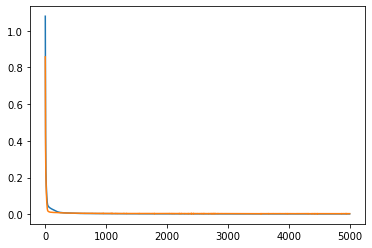

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

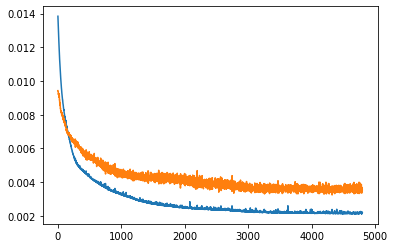

In [18]:
plt.plot(history.history['loss'][200:])
plt.plot(history.history['val_loss'][200:])
plt.show()

In [19]:
start = time.time()
history = model.fit(train_x, train_y, epochs=5000, verbose=0, batch_size=64, validation_split=0.1)
print("elapsed :", (time.time() - start))

elapsed : 124.6626706123352


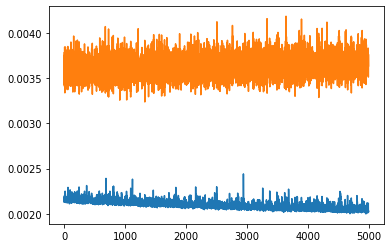

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [21]:
loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


4/4 [==============================] - 0s 3ms/step - loss: 0.0169 - mape: 960445.6250
loss= 0.016852175816893578
mape= 960445.625


In [22]:
y_ = model.predict(test_x)

for i in range(50):
  print(test_y[i], y_[i])


0.03603603603603605 [0.06141482]
0.2972972972972973 [0.26685077]
0.30180180180180183 [0.31093037]
0.48198198198198194 [0.34740567]
0.37387387387387394 [0.34594396]
0.42567567567567566 [0.28333545]
0.5765765765765766 [0.41965926]
0.3896396396396396 [0.33365178]
0.3355855855855856 [0.2631094]
0.39639639639639646 [0.27135992]
0.29279279279279286 [0.25209033]
0.20045045045045046 [0.18925868]
0.2747747747747748 [0.21601759]
1.0 [0.8075156]
0.3423423423423424 [0.18255459]
0.42117117117117125 [0.2973817]
0.41891891891891897 [0.36502382]
0.31981981981981983 [0.32458264]
0.3040540540540541 [0.22657715]
0.3851351351351352 [0.31346977]
0.14414414414414414 [0.08299999]
0.1036036036036036 [0.17733543]
0.32432432432432434 [0.2846079]
0.29054054054054057 [0.15058579]
0.34459459459459457 [0.29778647]
0.3918918918918919 [0.42590576]
0.4932432432432432 [0.47269118]
0.5518018018018018 [0.36969382]
0.08783783783783784 [0.14750563]
0.36936936936936937 [0.31928894]
0.35135135135135137 [0.3009262]
0.19144144

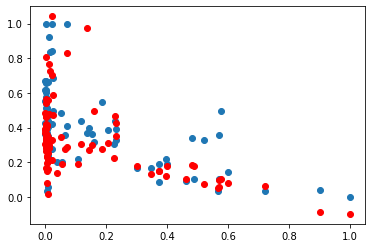

In [23]:
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x.T[0],test_y)
plt.scatter(test_x.T[0],y_, color="r")
plt.show()

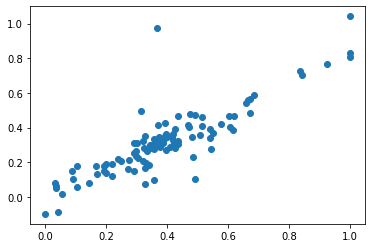

In [24]:
plt.scatter(test_y, y_)
plt.show()

참고 : https://www.marktechpost.com/2019/06/17/regression-with-keras-deep-learning-with-keras-part-3/